### Codigo para la propagación de onda elástica 2D PSV en un medio homogeneo mediante el esquema velocidad - esfuerzo y rejilla escalonada (usado en tesis)
En este Notebook se presenta un codigo para la propagación de onda elástica 2D PSV en un medio homogeneo mediante el esquema velocidad - esfuerzo y rejilla escalonada propuesto por Virieux (1986), como resultado se muestra en la figura 1 cuatro cuadros donde se muestra el avance de la onda P mediante la divergencia, la onda S mediante el rotor y las velocidades $v_x$ y $v_z$

#### Sistema de ecuaciones de onda elástica 2D
El sistema de ecuaciones para la propagación de la onda elástica en 2D en el esquema velocidad - esfuerzo donde el movimiento de la particula es en la dirección x (horizontal) y en la dirección z (vertical) son:

$$
\frac{\partial v_x}{\partial t} = \frac{1}{\rho} \left( \frac{\partial \tau_{xx}}{\partial x} + \frac{\partial \tau_{xz}}{\partial z} \right)
$$
$$
\frac{\partial v_z}{\partial t} = \frac{1}{\rho} \left( \frac{\partial \tau_{xz}}{\partial x} + \frac{\partial \tau_{zz}}{\partial z} \right)
$$
$$
\frac{\partial \tau_{xx}}{\partial t} = (\lambda + 2\mu)\frac{\partial v_x}{\partial x} + \lambda \frac{\partial v_z}{\partial z}
$$
$$
\frac{\partial \tau_{zz}}{\partial t} = (\lambda + 2\mu)\frac{\partial v_z}{\partial z} + \lambda \frac{\partial v_x}{\partial x}
$$
$$
\frac{\partial \tau_{xz}}{\partial t} = \mu \left( \frac{\partial v_x}{\partial z} + \frac{\partial v_z}{\partial x} \right)
$$

donde $ \rm {\rho} $ es la densidad, $ \rm {\lambda}$ y $ \rm {\mu}$ son los parámetros de Lamé, $ \rm{(v_x,\; v_z)}$ es el vector de velocidad de partículas , $ \rm {\tau_{xx}} $, $ \rm{\tau_{zz}} $, $ \rm{\tau_{xz}}$ son los componentes del tensor esfuerzo

#### Implementación númerica mediante el metodo de rejilla escalonada
Para la solución numérica de las ecuaciones de movimiento elásticas hay que discretizarlas en el tiempo y el espacio en una cuadrícula. Las velocidades de las partículas $\rm{\mathbf{v}}$, los esfuerzos $\rm{\tau_{ij}}$, los parámetros de Lamé $\rm{\lambda}$ y $\rm{\mu}$ son calculado y definido en coordenadas cartesianas discretas $\rm{x = i \; dx}$, $\rm{z = j \; dz}$ y tiempos discretos $\rm{t = n \; dt}$. $\rm{dx}$ y $\rm{dz}$ denota la distancia espacial entre dos puntos de cuadrícula adyacentes en el eje x y eje z respectivamente y $\rm{dt}$ es la diferencia entre dos pasos de tiempo sucesivos. Por lo tanto, cada punto de la cuadrícula se encuentra en el intervalo $\rm{i\ en N | [1, nx]}$, $\rm {j\ en N | [1, nz]}$ y $\rm{n\ en N | [1, nt]}$, donde $\rm{nx}$, $\rm{nz}$ y $\rm{nt}$ son el número de puntos discretos de la cuadrícula espacial y el número de pasos de tiempo, respectivamente.

Finalmente, las derivadas parciales se reemplazan por operadores **de diferencia finita (FD)**. Se pueden distinguir dos tipos de operadores, operadores hacia adelante y hacia atrás $ \rm {D^+, \; D^-}$. La derivada de una función f(x) con respecto a una variable x puede ser aproximada por los siguientes operadores de segundo orden:

$$\rm{D^+_x f = \frac{f_{i+1}-f_{i}}{dx} \hspace{1 cm} \text{operador hacia adelante}} $$

$$\rm{D^-_x f = \frac{f_i-f_{i-1}}{dx} \hspace{1 cm} \text{operador hacia atras}} $$

Para calcular las derivadas espaciales de las variables de campo de onda en las posiciones correctas entre sí, las variables no se colocan en los mismos puntos de la cuadrícula, sino que se escalonan por la mitad de la distancia del punto de la cuadrícula espacial (Virieux 1986). La Figura 1 muestra la distribución de los parámetros del material y las variables del campo de onda en la cuadrícula espacial.

![Staggered grid](./Staggered_grid.png)

En el siguiente paso, discretizamos las ecuaciones de movimiento para el problema 2D PSV utilizando un enfoque de diferencia finita escalonada. Primero, discretizamos la componente x de la ecuación de momento aproximando las derivadas espaciales

$$\rm{\frac{\partial \tau_{xx}}{\partial x} \approx \frac{\tau_{xx}(j,i+1) - \tau_{xx}(j,i)}{dx}}, \rm{\frac{\partial \tau_{xz}}{\partial z} \approx \frac{\tau_{xz}(j+1/2, i) - \tau_{xz}(j-1/2,i)}{dz}} $$

Y la derivada temporal viene dada por

$$\rho \rm{\frac{\partial v_x}{\partial t} \approx \rho_x(j,i+1/2) \frac{v_x^{n+1/2}(j,i+1/2) - v_x^{n-1/2}(j,i+1/2)}{dt}} $$

Insertandola en la ecuación diferencial parcial

$$\rm{\rho \frac{\partial v_x}{\partial t} = \frac{\partial \tau_{xx}}{\partial x} + \frac{\partial \tau_{xz}}{\partial z}} $$

lleva a

$$\rho_x(j,i+1/2) \frac{v_x^{n+1/2}(j,i+1/2) - v_x^{n-1/2}(j,i+1/2)}{dt} = \frac{\tau_{xx}^n(j,i+1) - \tau_{xx}^n(j,i)}{dx} + \frac{\tau_{xz}^n(j+1/2, i) - \tau_{xz}^n(j-1/2,i)}{dz} $$

Despues  reordenando  para $v_x^{n+1/2}(j,i+1/2)$ se obtiene el siguiente esquema de FD explicito para el componente  x del la ecuación de  momentum:

$$\rm{v_x^{n+1/2}(j,i+1/2) = v_x^{n-1/2}(j,i+1/2) + \frac{dt}{\rho_x(j,i+1/2)}\cdot \biggl(\frac{\tau^n_{xx}(j,i+1) - \tau^n_{xx}(j,i)}{dx} + \frac{\tau^n_{xz}(j+1/2, i) - \tau^n_{xz}(j-1/2,i)}{dz} \biggr)} $$

Usando un enfoque similar, podemos derivar el esquema FD para la componente y de la ecuación de momento ...

$$\rm{v_z^{n+1/2}(j,i+1/2) = v_z^{n-1/2}(j,i+1/2) + \frac{dt}{\rho_z(j+1/2,i)}\cdot \biggl(\frac{\tau^n_{xz}(j, i+1/2) - \tau^n_{xz}(j,i-1/2)}{dx} + \frac{\tau^n_{zz}(j+1,i) - \tau^n_{zz}(j,i)}{dz} \biggr)} $$

... y los esfuerzos ...

$$
\begin{split}   
\rm{\tau^{n+1}_{xx}(j,i)}\;&\rm{= \tau_{xx}^{n}(j,i) + dt\cdot\lambda(j,i)\cdot \biggl(v^{n+1/2}_{xx}(j,i) + v^{n+1/2}_{zz}(j,i) \biggr) + 2 dt\cdot  \mu(j,i) \cdot  v^{n+1/2}_{xx}(j,i)}\\ 
\rm{\tau^{n+1}_{zz}(j,i)}\;&\rm{= \tau_{zz}^{n}(j,i) + dt\cdot\lambda(j,i)\cdot \biggl(v^{n+1/2}_{xx}(j,i) + v^{n+1/2}_{zz}(j,i) \biggr) + 2 dt\cdot  \mu(j,i) \cdot  v^{n+1/2}_{zz}(j,i)}\\ 
\rm{\tau^{n+1}_{xz}(j+1/2,i+1/2)}\;&\rm{=\tau^{n}_{xz}(j+1/2,i+1/2) + dt\cdot\mu_{xz}(j+1/2,i+1/2)\biggl(v^{n+1/2}_{xz}(j+1/2,i+1/2) + v^{n+1/2}_{zx}(j+1/2,i+1/2)\biggr)}\\
\end{split}
$$

con las derivadas espaciales

$$
\begin{split}  
\rm{v_{xx}(j,i)}\; & \rm{= \frac{v_x(j,i+1/2)-v_x(j,i-1/2)}{dx}}\\ 
\rm{v_{zz}(j,i)}\; & \rm{= \frac{v_z(j+1/2,i)-v_z(j-1/2,i)}{dz}}\\ 
\rm{v_{zx}(j+1/2,i+1/2)}\; & \rm{= \frac{v_z(j+1/2, i+1)-v_z(j+1/2, i)}{dx}}\\ 
\rm{v_{xz}(j+1/2,i+1/2)}\; & \rm{= \frac{v_x(j+1,i+1/2)-v_x(j, i+1/2)}{dz}}\\
\end{split}
$$

#### Termino o función fuente

En este codigo se uso como función fuente se uso una ondicula  cuya ecuación es:

$$
s= exp\left(-f_0^2*((t-t_0)*dt)^2\right)
$$

donde $f_0$ es la frecuencia dominante y $t_0$ es el retraso en tiempo

In [24]:
# Import Libraries 
# ----------------------------------------------
%matplotlib notebook
import numpy as np
import numpy.matlib as npmat
import matplotlib.pyplot as plt

In [25]:
def d(comp,inpu,dire):
    if(comp=='x'): idim = 0
    elif(comp=='z'): idim = 1
    
    if(dire == '+'):
        return (9/8*(np.roll(inpu, -1, axis = idim)-inpu)
                -1/24*(np.roll(inpu, -2, axis = idim)-np.roll(inpu, 1, axis = idim)))/dx
    elif(dire == '-'):
        return (9/8*(inpu - np.roll(inpu, 1, axis = idim))
                -1/24*(np.roll(inpu, -1, axis = idim)-np.roll(inpu, 2, axis = idim)))/dx

In [26]:
# Input Parameter
# ----------------------------------------------

# Discretization
c1=20           # Number of grid points per dominant wavelength
c2=0.6          # CFL-Number for 2D CFL< 0.606
nx=400          # number of grid points in x-direction
nz=400          # number of grid points in z-direction
T=0.43
idisp = 10 # display frequency

# The grid number of pml
pml = 50                              
m = nx + 2*pml
n = nz + 2*pml
 
# Source Signal
f0= 50      # Center frequency Ricker-wavelet
q0= 1      # Maximum amplitude Ricker-Wavelet
t0= 1.5/f0
xscr = int(m/2)-1;  zscr = pml+6 # Source position (in grid points)



In [27]:
# Velocity and density
Vpp=3000*np.ones((nx,nz))   # P-wave velocity in m/s
Vss=1500*np.ones((nx,nz))   # S-wave velocity in m/s
den= 2200*np.ones((nx,nz))       # Density in Kg/m^3

for j in range((nz//2)-1,nz):
    Vpp[:,j]=Vpp[:,j]*1.5
    
for j in range((nz//2)-1,nz):
    Vss[:,j]=Vss[:,j]*1.5
   
for j in range((nz//2)-1,nz):
    den[:,j]=den[:,j]*1.25

<IPython.core.display.Javascript object>


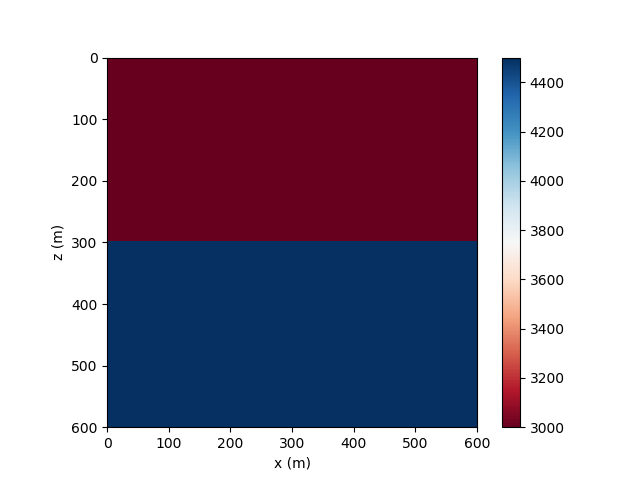

<IPython.core.display.Javascript object>


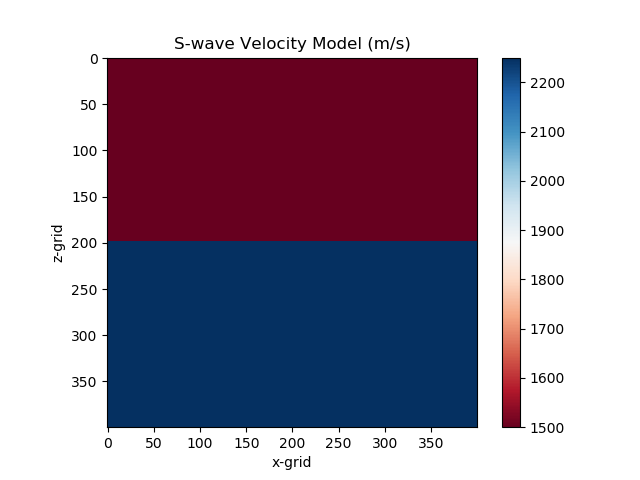

<IPython.core.display.Javascript object>


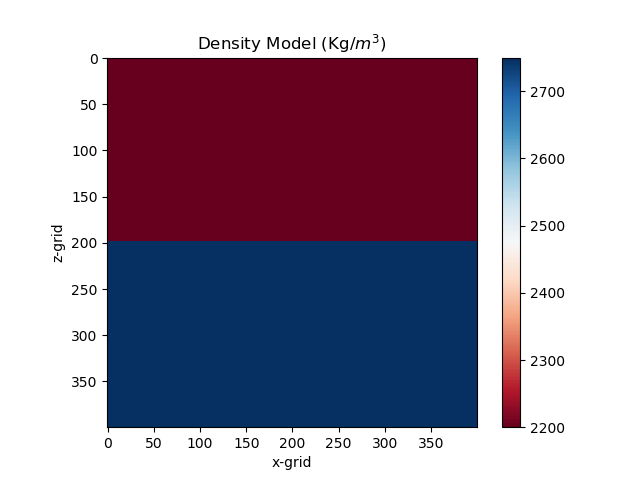

In [28]:
# Plotting velocity and density model
plt.ion()
fig1 = plt.figure()
#plt.title('P-wave Velocity Model (m/s)')
plt.xlabel('x (m)')
plt.ylabel('z (m)')
im = plt.imshow(Vpp.transpose(),vmin=Vpp.min(), vmax=Vpp.max(), animated=True,
                interpolation="nearest", cmap=plt.cm.RdBu,extent=[0,(nx)*1.5,(nz)*1.5,0],aspect = 'equal')
fig1.colorbar(im)

fig2 = plt.figure()
plt.title('S-wave Velocity Model (m/s)')
plt.xlabel('x-grid')
plt.ylabel('z-grid')
im = plt.imshow(Vss.transpose(),vmin=Vss.min(), vmax=Vss.max(), animated=True,
                interpolation="nearest", cmap=plt.cm.RdBu)
fig2.colorbar(im)

fig3 = plt.figure()
plt.title('Density Model (Kg/$m^3$)')
plt.xlabel('x-grid')
plt.ylabel('z-grid')
im = plt.imshow(den.transpose(),vmin=den.min(), vmax=den.max(), animated=True,
                interpolation="nearest", cmap=plt.cm.RdBu)
fig3.colorbar(im)

plt.show()

<IPython.core.display.Javascript object>


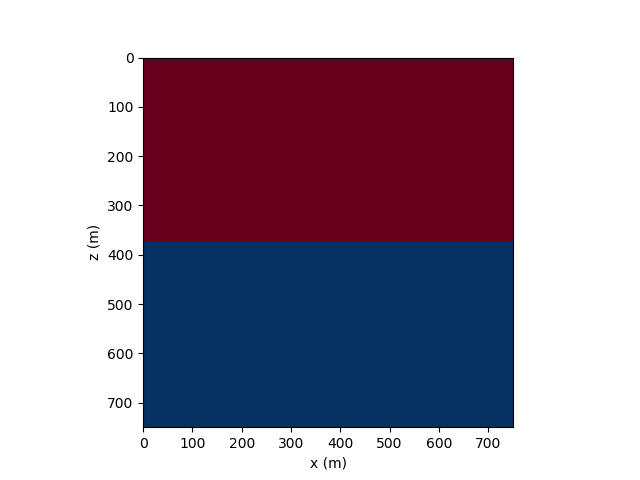

In [29]:
# PML extra edge

Vp=np.zeros((m,n))                        # medium velocity of P wave,m/s,zero fill
Vp[pml:pml+nx,pml:pml+nz] = Vpp
Vp[pml:pml+nx,0:pml] = np.transpose(npmat.repmat(Vpp[:,0],pml,1))
Vp[pml:pml+nx,nz+pml:2*pml+nz] = np.transpose(npmat.repmat(Vpp[:,nz-1],pml,1))
Vp[0:pml,:] = npmat.repmat(Vp[pml,:],pml, 1)
Vp[pml+nx:2*pml+nx,:] = npmat.repmat(Vp[pml+nx-1,:],pml, 1)
del Vpp

Vs=np.zeros((m,n))                        # medium velocity of S wave,m/s,zero fill
Vs[pml:pml+nx,pml:pml+nz] = Vss
Vs[pml:pml+nx,0:pml] = np.transpose(npmat.repmat(Vss[:,0],pml,1))
Vs[pml:pml+nx,nz+pml:nz+2*pml] = np.transpose(npmat.repmat(Vss[:,nz-1],pml,1))
Vs[0:pml,:] = npmat.repmat(Vs[pml,:],pml, 1)
Vs[pml+nx:2*pml+nx,:] = npmat.repmat(Vs[pml+nx-1,:],pml, 1)
del Vss;

rho=np.zeros((m,n))                        # medium density,kg/m**3,zero fill
rho[pml:pml+nx,pml:pml+nz] = den;
rho[pml:pml+nx,0:pml] = np.transpose(npmat.repmat(den[:,0],pml,1))
rho[pml:pml+nx,nz+pml:nz+2*pml] = np.transpose(npmat.repmat(den[:,nz-1],pml,1))
rho[0:pml,:] = npmat.repmat(rho[pml,:],pml, 1)
rho[pml+nx:2*pml+nx,:] =npmat.repmat(rho[pml+nx-1,:],pml,1)
del den

# Calculate Lame  Parameters
lam=rho*(Vp**2 - 2*Vs**2)
mu=rho*Vs**2
del Vs

plt.ion()
fig1 = plt.figure()
#plt.title('P-wave Velocity Model (m/s)')
plt.xlabel('x (m)')
plt.ylabel('z (m)')
im = plt.imshow(Vp.transpose(),vmin=Vp.min(), vmax=Vp.max(), animated=True,
                interpolation="nearest", cmap=plt.cm.RdBu,extent=[0,(m)*1.5,(n)*1.5,0],aspect = 'equal')

In [30]:
## Preparation 

# Init wavefields
vx=np.zeros((m,n))
vz=np.zeros((m,n))
sxx=np.zeros((m,n))
szz=np.zeros((m,n))
sxz=np.zeros((m,n))
vx1=np.zeros((m,n))
vx2=np.zeros((m,n))
vz1=np.zeros((m,n))
vz2=np.zeros((m,n))
sxx1=np.zeros((m,n))
sxx2=np.zeros((m,n))
szz1=np.zeros((m,n))
szz2=np.zeros((m,n))
sxz1=np.zeros((m,n))
sxz2=np.zeros((m,n))

vol   = np.zeros([m,n])
curl  = np.zeros([m,n])

cmin=Vp.min()  # Lowest P-wave velocity
cmax=Vp.max()  # Highest P-wave velocity
fmax=2*f0              # Maximum frequency
dx=cmin/(fmax*c1)      # Spatial discretization (in m)
dz=dx 
dt=dx/(cmax)*c2        # Temporal discretization (in s)
lampda_min=cmin/fmax   # Smallest wavelength
print(dx,dz,dt)
del Vp

# Create space and time vector
x=np.arange(0,dx*nx-dx,dx) # Space vector
z=np.arange(0,(dz*nz-dz),dz) # Space vector
t=np.arange(0,(T-dt),dt)    # Time vector
nt=len(t)       # Number of time steps

# Shot gathers
seismo_vx=np.zeros((m,nt))
seismo_vz=np.zeros((m,nt))

1.5 1.5 0.00019999999999999998


<IPython.core.display.Javascript object>


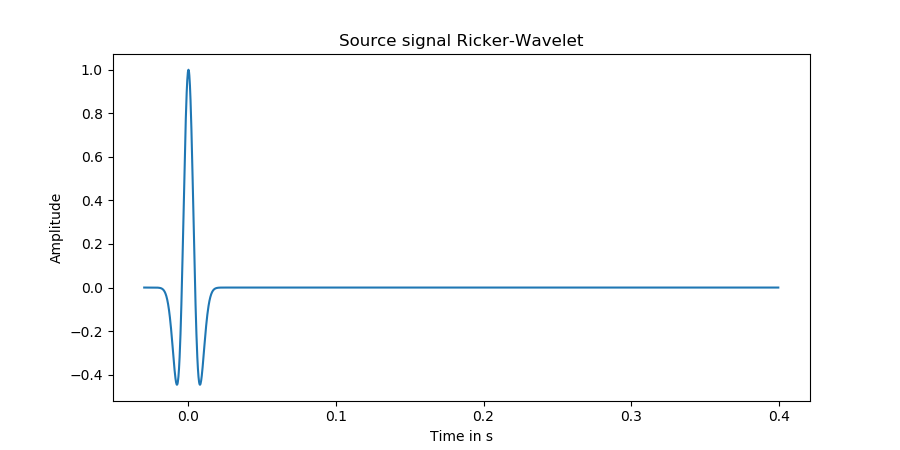

In [31]:
# Source signal - Ricker-wavelet

# Initialise source
tau=np.pi*f0*(t-t0);
s=q0*(1-2*tau**2)*np.exp(-tau**2);

# Plotting source signal
plt.ion()
fig4 = plt.figure(figsize=(9,4.5))
plt.plot(t-t0,s)
plt.title('Source signal Ricker-Wavelet')
plt.xlabel('Time in s')
plt.ylabel('Amplitude')
plt.show() 

In [32]:
# Attenuation(pml)
R=0.5e-0;          # theoretical reflection coefficient
ddx=np.zeros((m,n)) 
ddz=np.zeros((m,n))
plx=pml*dx
plz=pml*dz
for i in range(0,m):
     for k in range(0,n):
         # zone1
         if i>=0 and i<=pml-1 and k>=0 and k<=pml-1:
             x=pml-k;z=pml-i
             ddx[i,k]=-np.log(R)*3*cmax*x**2/(2*plx**2)
             ddz[i,k]=-np.log(R)*3*cmax*z**2/(2*plz**2)
         elif i>=0 and i<=pml-1 and k>m-pml-1 and k<=m:
             x=k-(m-pml);z=pml-i
             ddx[i,k]=-np.log(R)*3*cmax*x**2/(2*plx**2)
             ddz[i,k]=-np.log(R)*3*cmax*z**2/(2*plz**2)
         elif i>n-pml-1 and i<=n and k>=0 and k<=pml-1:
             x=pml-k;z=i-(n-pml);
             ddx[i,k]=-np.log(R)*3*cmax*x**2/(2*plx**2)
             ddz[i,k]=-np.log(R)*3*cmax*z**2/(2*plz**2)
         elif i>n-pml-1 and i<=n and k>m-pml-1 and k<=m:
             x=k-(m-pml);z=i-(n-pml);
             ddx[i,k]=-np.log(R)*3*cmax*x**2/(2*plx**2)
             ddz[i,k]=-np.log(R)*3*cmax*z**2/(2*plz**2)
  
         # zone2
         elif i<=pml-1 and k>pml-1 and k<m-pml:
             x=0;z=pml-i;
             ddx[i,k]=0
             ddz[i,k]=-np.log(R)*3*cmax*z**2/(2*plz**2)
         elif  i>n-pml-1 and i<=n and k>pml-1 and k<=m-pml-1:
             x=0;z=i-(n-pml);
             ddx[i,k]=0
             ddz[i,k]=-np.log(R)*3*cmax*z**2/(2*plz**2)
         # zone3
         elif i>pml-1 and i<=n-pml-1 and k<=pml-1:
             x=pml-k;z=0;
             ddx[i,k]=-np.log(R)*3*cmax*x**2/(2*plx**2)
             ddz[i,k]=0
         elif i>pml-1 and i<=n-pml-1 and k>m-pml-1 and k<=m:
             x=k-(m-pml);z=0;
             ddx[i,k]=-np.log(R)*3*cmax*x**2/(2*plx**2)
             ddz[i,k]=0

ddx=np.transpose(ddx)
ddz=np.transpose(ddz) 

<IPython.core.display.Javascript object>


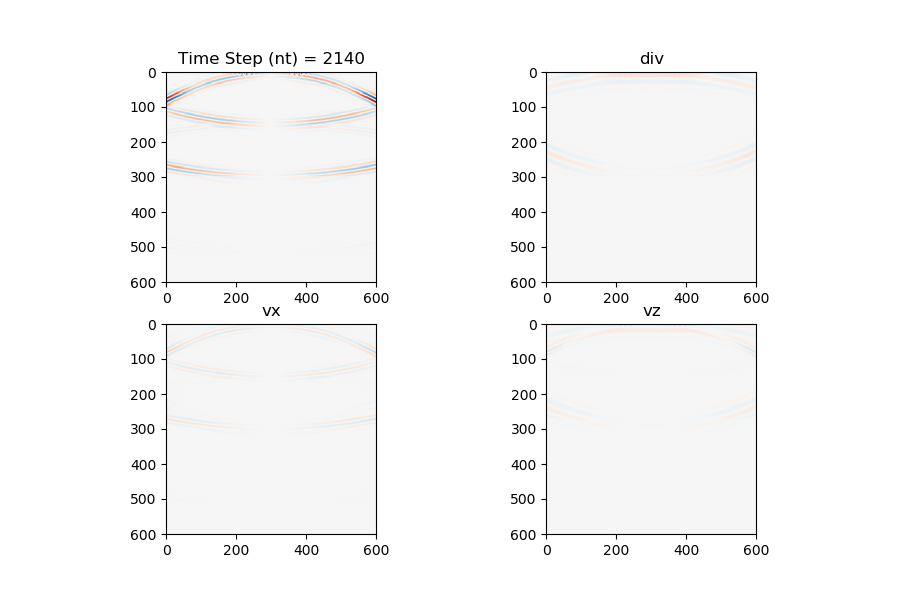

In [33]:
# Plot preparation
# Initialize animated plot
plt.ion()
fig5 = plt.figure(figsize=(9,6))
f1 = fig5.add_subplot(2, 2, 1)
f2 = fig5.add_subplot(2, 2, 2)
f3 = fig5.add_subplot(2, 2, 3)
f4 = fig5.add_subplot(2, 2, 4)
f1.set_title('curl')
f2.set_title('div')
f3.set_title('vx')
f4.set_title('vz')

curlp = f1.imshow(curl[pml:m-pml,pml:m-pml].transpose(), interpolation='nearest', animated=True,
                   vmin=-2.5e-11, vmax=2.5e-11, cmap=plt.cm.RdBu,extent=[0,(m-2*pml)*dx,(n-2*pml)*dz,0],aspect = 'equal')
divp = f2.imshow(vol[pml:m-pml,pml:m-pml].transpose(), interpolation='nearest', animated=True,
                   vmin=-2.5e-11, vmax=2.5e-11, cmap=plt.cm.RdBu,extent=[0,(m-2*pml)*dx,(n-2*pml)*dz,0],aspect = 'equal')
vxp = f3.imshow(vx[pml:m-pml,pml:m-pml].transpose(), interpolation='nearest', animated=True,
                   vmin=-2.5e-10, vmax=2.5e-10, cmap=plt.cm.RdBu,extent=[0,(m-2*pml)*dx,(n-2*pml)*dz,0],aspect = 'equal')
vzp = f4.imshow(vz[pml:m-pml,pml:m-pml].transpose(), interpolation='nearest', animated=True,
                   vmin=-2.5e-10, vmax=2.5e-10, cmap=plt.cm.RdBu,extent=[0,(m-2*pml)*dx,(n-2*pml)*dz,0],aspect = 'equal')
plt.show()


In [34]:
for tt in range(1,nt):

    # Inject source wavelet (explosion)
       
    sxx[xscr,zscr]=sxx[xscr,zscr]+s[tt]   
    szz[xscr,zscr]=szz[xscr,zscr]+s[tt]
    
    # Free surface
    szz[:,pml-1]=0.
    sxz[:,pml-1]=0.
               
    # Update velocity
    vx1=((1-0.5*dt*ddx)*vx1+(dt/rho)*d('x',sxx,'-'))/(1+0.5*dt*ddx)  
    vx2=((1-0.5*dt*ddz)*vx2+(dt/rho)*d('z',sxz,'-'))/(1+0.5*dt*ddz)
    vx = vx1+vx2
    
    vz1=((1-0.5*dt*ddx)*vz1+(dt/rho)*d('x',sxz,'+'))/(1+0.5*dt*ddx)
    vz2=((1-0.5*dt*ddz)*vz2+(dt/rho)*d('z',szz,'+'))/(1+0.5*dt*ddz)
    vz = vz1+vz2 
    
            
    curl = d('z',vx,'+') - d('x',vz,'-')
    vol = d('x',vx,'+') + d('z',vz,'-')            
                       
    # Update pressure
    sxx1=((1-0.5*dt*ddx)*sxx1+(lam+2*mu)*dt*d('x',vx,'+'))/(1+0.5*dt*ddx)
    sxx2=((1-0.5*dt*ddz)*sxx2+lam*dt*d('z',vz,'-'))/(1+0.5*dt*ddz)
    sxx = sxx1 + sxx2    

    szz1=((1-0.5*dt*ddx)*szz1+lam*dt*d('x',vx,'+'))/(1+0.5*dt*ddx)
    szz2=((1-0.5*dt*ddz)*szz2+(lam+2*mu)*dt*d('z',vz,'-'))/(1+0.5*dt*ddz) 
    szz = szz1+szz2 

    sxz1=((1-0.5*dt*ddx)*sxz1+mu*dt*d('x',vz,'-'))/(1+0.5*dt*ddx)
    sxz2=((1-0.5*dt*ddz)*sxz2+mu*dt*d('z',vx,'+'))/(1+0.5*dt*ddz)
    sxz = sxz1+sxz2
    
    seismo_vx[0:m,tt]=vx[0:m,pml]
    seismo_vz[0:m,tt]=vz[0:m,pml]
    
    # Plot every time step (nt)
    if (tt % idisp) == 0:
        curlp.set_data(curl[pml:m-pml,pml:m-pml].transpose())
        f1.set_title("Time Step (nt) = %i" % (tt))
        divp.set_data(vol[pml:m-pml,pml:m-pml].transpose())
        vxp.set_data(vx[pml:m-pml,pml:m-pml].transpose())
        vzp.set_data(vz[pml:m-pml,pml:m-pml].transpose())
        plt.gcf().canvas.draw()
        


<IPython.core.display.Javascript object>


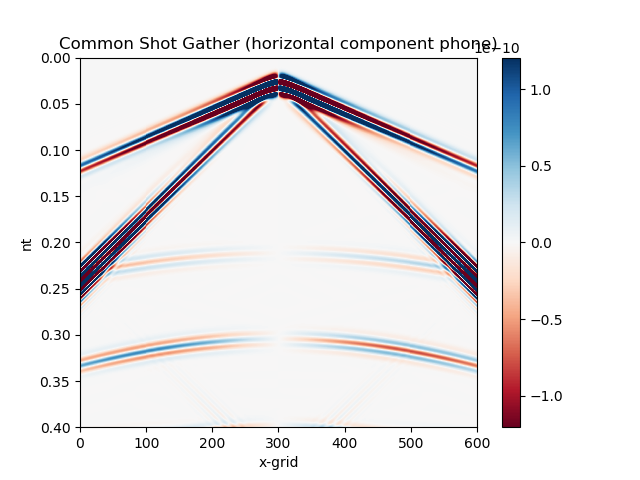

<IPython.core.display.Javascript object>


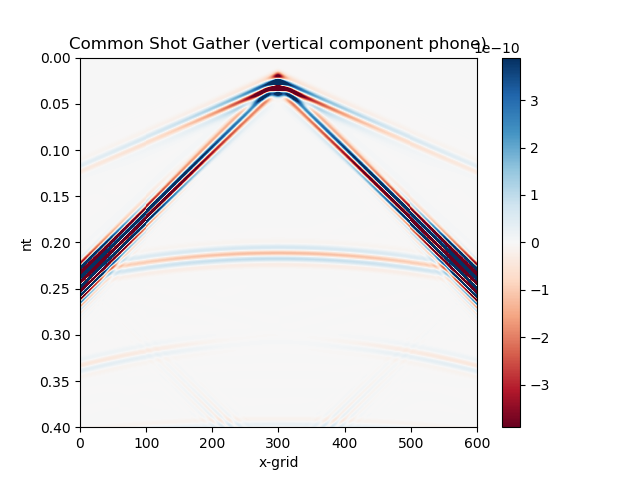

In [35]:
# Plot Shot gathers 5 pts below free surface
    
fac=0.1
ymx=abs(seismo_vx).max()
clim=np.array([-fac*ymx, fac*ymx])
plt.ion()
fig2 = plt.figure()
plt.title('Common Shot Gather (horizontal component phone)')
plt.xlabel('x-grid')
plt.ylabel('nt')
im = plt.imshow(seismo_vx[pml:m-pml,:].transpose(),vmin=clim.min(), vmax=clim.max(), animated=True,
                interpolation="nearest", cmap=plt.cm.RdBu,extent=[0,(m-2*pml)*dx,nt*dt - t0,0],aspect = 'auto')
fig2.colorbar(im)
plt.show()
plt.savefig("DFDT_het_2D_vx.png", bbox_inches='tight')

fac=0.1
ymx=abs(seismo_vz[pml:m-pml,:]).max()
clim=np.array([-fac*ymx, fac*ymx])
plt.ion()
fig3 = plt.figure()
plt.title('Common Shot Gather (vertical component phone)')
plt.xlabel('x-grid')
plt.ylabel('nt')
im = plt.imshow(seismo_vz[pml:m-pml,:].transpose(),vmin=clim.min(), vmax=clim.max(), animated=True,
                interpolation="nearest", cmap=plt.cm.RdBu,extent=[0,(m-2*pml)*dx,nt*dt - t0,0],aspect = 'auto')
fig3.colorbar(im)
plt.show()
#plt.savefig("DFDT_het_2D_vz.png", bbox_inches='tight')